In [ ]:
#-- Install required packages
!pip install statsmodels==0.13.2

     |████████████████████████████████| 9.8 MB 589 kB/s 
     |████████████████████████████████| 233 kB 40.3 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#-- Load required packages
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

import seaborn as sns
import pandas as pd

In [ ]:
#-- Define basinc functions to simulate example data
#-- Slide 4

# function (1)
#-- sim_x is the function to simulate n random numbers from 0 to 1
def sim_x(n):                   
    x = np.random.random((n,1)) # U[0,1]
    return x

# function (2)
#-- true mean function
def f(x):
    true_y = 1 + 2*x + 5*np.sin(5*x)
    return true_y

#-- function (3)
#-- generate Y|X from N{f(x), sd}; N: normal distribution
# sd here is the standard deviation of error in observational data
# the error is assumed to be a Gaussian noise
def sim_y(x, sd):
    n = len(x)
    error = np.random.normal(0,sd,n).reshape(n,1) # (n,) vector to (n,1) vector
    y = f(x) + error
    return y

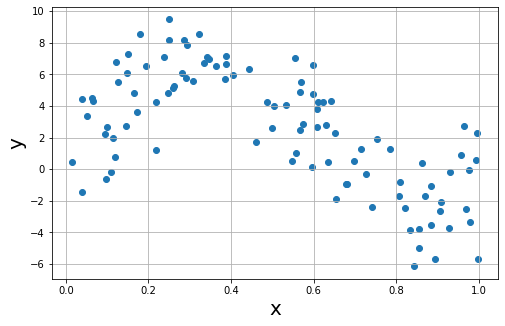

In [ ]:
#-- Slide 2 in Module 2-2
#-- Model Settings
n = 100
sd = 2
x = sim_x(n)
y = sim_y(x, sd)

#-- Plot the simulated x and y data
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x,y)

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

plt.grid()

[[ 1.          9.44061228]
 [ 2.          4.72783055]
 [ 3.          3.43813052]
 [ 5.          3.40306102]
 [10.          3.33459527]
 [20.          2.86145855]]


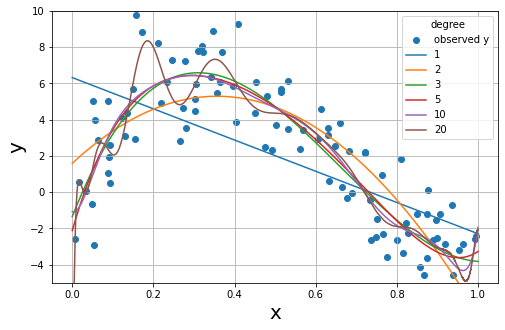

In [ ]:
#-- Slide 3 in Module 2-2
n = 100
x = sim_x(n)
y = sim_y(x, sd)

xseq = np.arange(0,1,1/n/100).reshape(n*100,1)

degree_list = [1,2,3,5,10,20]
Y_pred_poly_d = np.zeros((len(xseq),len(degree_list)))
Y_pred_MSE = np.zeros((len(degree_list),2))

for i, d in enumerate(degree_list):
    poly = make_pipeline(PolynomialFeatures(d), LinearRegression())
    poly.fit(x,y)
    tpred = poly.predict(xseq)
    Y_pred_poly_d[:,i:i+1] = tpred
    tpred_for_MSE = poly.predict(x)
    Y_pred_MSE[i,0] = d
    Y_pred_MSE[i,1] = mean_squared_error(tpred_for_MSE, y)

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x,y, label='observed y')
plt.plot(xseq,Y_pred_poly_d,label=degree_list)

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add grid and legend
plt.grid()
plt.legend(loc=0, title='degree')
plt.ylim([-5,10])

print(Y_pred_MSE)

(-5.0, 10.0)

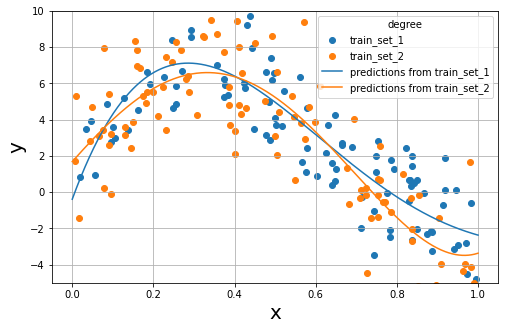

In [ ]:
#-- Slide 4 in Module 2-2
n = 100
d = 4
xseq = np.arange(0,1,1/n/100).reshape(n*100,1)
x_trainset = np.zeros((n,2))
y_trainset = np.zeros((n,2))
Y_pred_poly_d = np.zeros((len(xseq),2))

for i in range(2):
    x = sim_x(n)
    y = sim_y(x, sd)
    poly = make_pipeline(PolynomialFeatures(d), LinearRegression())
    poly.fit(x,y)
    tpred = poly.predict(xseq)
    
    x_trainset[:,i:i+1] = x
    y_trainset[:,i:i+1] = y
    Y_pred_poly_d[:,i:i+1] = tpred

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x_trainset[:,0],y_trainset[:,0], label='train_set_1')
plt.scatter(x_trainset[:,1],y_trainset[:,1], label='train_set_2')
plt.plot(xseq,Y_pred_poly_d[:,0], label='predictions from train_set_1')
plt.plot(xseq,Y_pred_poly_d[:,1], label='predictions from train_set_2')

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add grid and legend
plt.grid()
plt.legend(loc=0, title='degree')
plt.ylim([-5,10])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

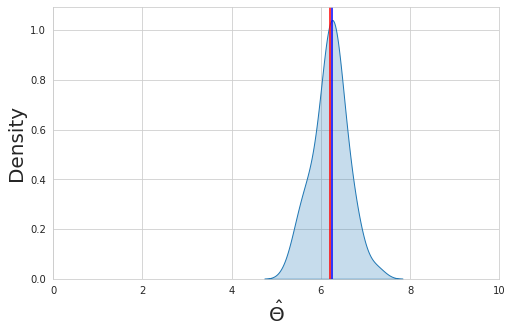

In [ ]:
#-- Slide 6 in Module 2-2
n = 100
d = 4

nos = 50 # number of simulation
theta_hat = np.zeros((nos,))
true_theta = f(0.25)

for i in range(nos):
    x = sim_x(n)
    y = sim_y(x, sd)
    poly = make_pipeline(PolynomialFeatures(d), LinearRegression())
    poly.fit(x,y)
    tpred = poly.predict(np.array([0.25]).reshape(-1,1))
    
    theta_hat[i] = tpred

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch
sns.set_style('whitegrid')
ax = sns.kdeplot(theta_hat, bw=0.5, shade=True)

plt.axvline(x=theta_hat.mean(), color='red')
plt.axvline(x=true_theta, color='blue')
plt.xlim([0, 10])
# set the labels
plt.xlabel('$\hat{\Theta}$', size=20)
plt.ylabel('Density', size=20)

In [ ]:
#-- Slide 12 in Module 2-2
n = 100
d_list = [0, 1, 2, 4, 5, 8]
nos = 2000 # number of simulations
xseq = np.arange(0,1,1/n/10).reshape(n*10,1)
y_test = sim_y(xseq, sd)
y_hat = np.zeros((len(xseq),nos,len(d_list)))
y_true = f(xseq)
k = 0
for d in d_list:

    for i in range(nos):
        x_train = sim_x(n)
        y_train = sim_y(x_train, sd)
        poly = make_pipeline(PolynomialFeatures(d), LinearRegression())
        poly.fit(x_train,y_train)
        tpred = poly.predict(xseq)
        
        y_hat[:,i:i+1,k:k+1]  = tpred.reshape(len(xseq),1,1)

    k = k+1;

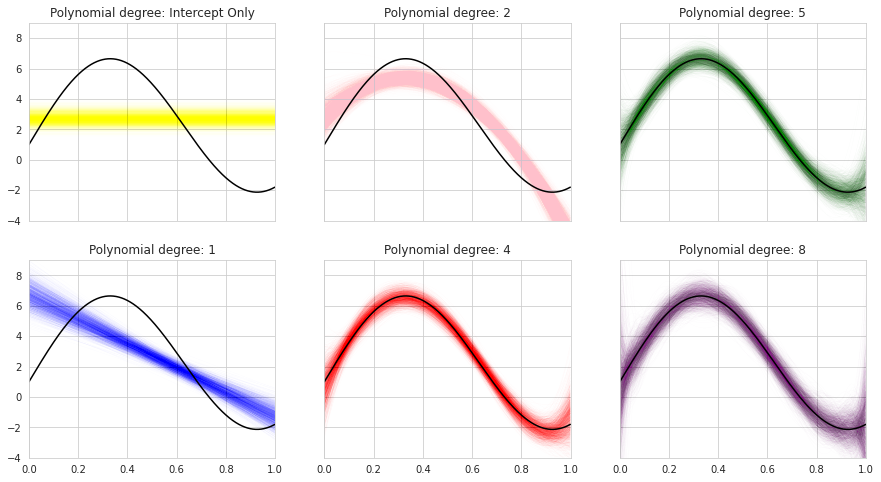

In [ ]:
#-- Slide 12 in Module 2-2 (figure)
# plot the data
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
fig.set_size_inches(15,8) # define the fig's size in inch

color_list = ['yellow', 'blue', 'pink', 'red', 'green', 'purple']
k=0;
for j in range(3):
    for i in range(2):
        t = y_hat[:,:,k];
        axs[i, j].plot(xseq,t, color=color_list[k], linewidth = 0.3, alpha=0.02);
        axs[i, j].plot(xseq, f(xseq), color='black');
        plt.ylim([-4,9])
        plt.xlim([0,1])
        if k == 0:
            axs[i, j].set_title(f'Polynomial degree: Intercept Only')
        else:
            axs[i, j].set_title(f'Polynomial degree: {d_list[k]}')
        k = k+1;

# set the labels
#plt.xlabel('x', size=20)
#plt.ylabel('f(x)', size=20)

In [ ]:
d_list

[0, 1, 2, 4, 5, 8]

- Bias of an estimator is defined as $E_{D}[\hat{\theta}]-\theta$ or bias $[\hat{f}(x)]=\mathbb{E}[\hat{f}(x)]-f(x)$
- Remember, $\theta=f(x)$ (blue line), $\hat{\theta}=\hat{f}(x)$ (density distribution), and $E_{D}[\hat{\theta}]$ is red line!
- Variance of an estimator is defined as $V_{D}[\hat{\theta}]=E_{D}\left[\hat{\theta}^{2}\right]-E_{D}[\hat{\theta}]^{2}$
- $\operatorname{or} \operatorname{var}[\hat{f}(x)]=\mathbb{E}\left[(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])^{2}\right]$
$$
=\mathbb{E}\left[\hat{f}(x)^{2}\right]-2 \mathbb{E}[\hat{f}(x)] \mathbb{E}[\mathbb{E}[\hat{f}(x)]]+\mathbb{E}[\hat{f}(x)]^{2}=\mathbb{E}\left[\hat{f}(x)^{2}\right]-\mathbb{E}[\hat{f}(x)]^{2}
$$

Text(0.5, 0, 'x')

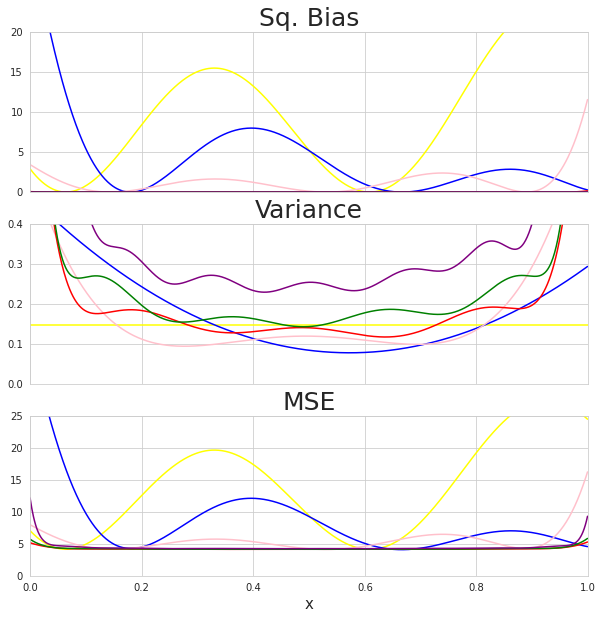

In [ ]:
# -- Slide 13 in Module 2-2
fig, axs = plt.subplots(3, sharex=True)
fig.set_size_inches(10,10) # define the fig's size in inch

for i in range(len(d_list)):
    t_y_hat = y_hat[:,:,i]

    # squared bias
    E_f_hat_x = np.mean(t_y_hat, axis=1) # E[f_hat(x)] in slide 7
    f_x = f(xseq).reshape(-1,)                            # f_x 
    sq_bias = (E_f_hat_x - f_x)**2  # Squared bias slide 9 Equation (8) 

    # variance
    E_sq_f_hat_x   = np.mean(t_y_hat**2, axis=1)   # E[f_hat_(x)^2]
    sq_E_f_hat_x   = (np.mean(t_y_hat, axis=1))**2 # E[f_hat_(x)]^2 
    var_sq_f_hat_x = E_sq_f_hat_x - sq_E_f_hat_x   # var[f_hat_(x)]

    # MSE
    MSE = sq_bias + var_sq_f_hat_x + sd**2 # a real MSE with test dataset=

    axs[0].plot(xseq, sq_bias, color=color_list[i])
    axs[1].plot(xseq, var_sq_f_hat_x, color=color_list[i])
    axs[2].plot(xseq, MSE, color=color_list[i])

axs[0].set_ylim([0, 20])
axs[0].set_title('Sq. Bias', fontsize=25)
axs[1].set_ylim([0, 0.4])
axs[1].set_title('Variance', fontsize=25)
axs[2].set_ylim([0, 25])
axs[2].set_title('MSE', fontsize=25)
axs[0].set_xlim([0, 1])
axs[2].set_xlabel('x', fontsize=15)

In [ ]:
# -- Slide 14 in Module 2-2
#-- Slide 6 in Module 2-2
n = 100
d_list = [0, 1, 2, 4, 5, 8]
nos = 2000 # number of simulation

x_points = np.array([0.25, 0.55]) # points that you want to predict
true_theta = f(x_points)          # true y for these points

theta_hat = np.zeros((nos,len(d_list),len(x_points)))

for xi, x in enumerate(x_points):
    for di, d in enumerate(d_list):
        for i in range(nos):
            x_train = sim_x(n)
            y_train = sim_y(x_train, sd)
            poly = make_pipeline(PolynomialFeatures(d), LinearRegression())
            poly.fit(x_train,y_train)
            tpred = poly.predict(x.reshape(-1,1))
            
            theta_hat[i,di,xi] = tpred.reshape(1,1,1)

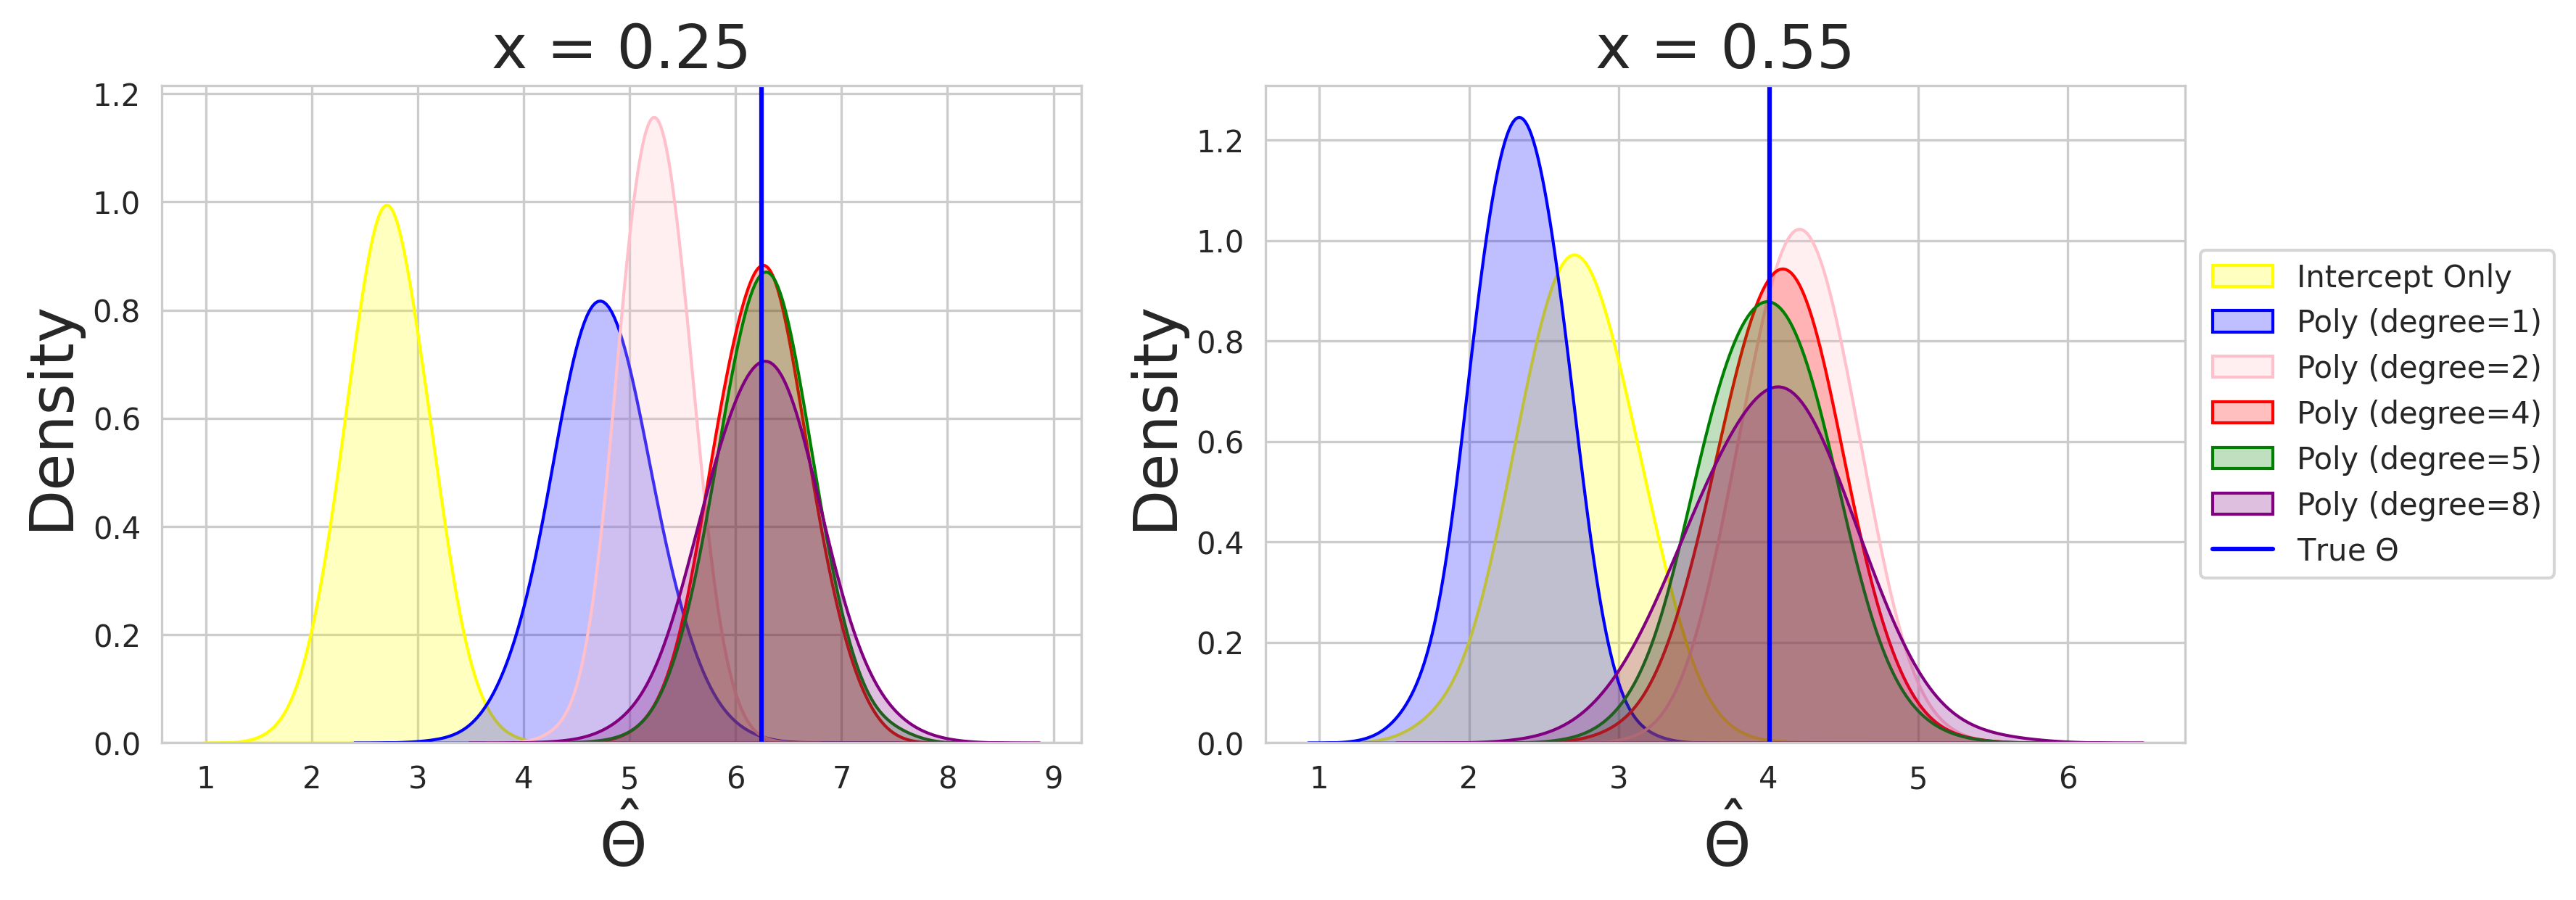

In [ ]:
# -- Slide 14 in Module 2-2 (figure)
fig, axs = plt.subplots(1,2, figsize=(12,4), dpi=300)
sns.set_style('whitegrid')
label_list = ['Intercept Only', 'Poly (degree=1)', 'Poly (degree=2)'
            ,'Poly (degree=4)', 'Poly (degree=5)', 'Poly (degree=8)']

for xi, xp in enumerate(x_points):
    for i, c in enumerate(color_list):
        sns.kdeplot(ax=axs[xi], x=theta_hat[:,i,xi], bw_method=0.5, shade=True, color=c, label=label_list[i]);
        #sns.kdeplot(ax=axs[1], x=theta_hat[:,i,1], bw_method=0.5, shade=True, color=c, label=label_list[i]);

    axs[xi].axvline(x=true_theta[xi], color='blue', label='True ${\Theta}$')
    axs[xi].set_xlabel('$\hat{\Theta}$', size=20)
    axs[xi].set_ylabel('Density', size=20)
    axs[xi].set_title(f'x = {xp}', size=20)

axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


$\begin{aligned} \operatorname{MSE}(f) &=\mathrm{E}_{D Y X}\left[\left(Y-\hat{f}_{D}(X)\right)^{2}\right] \\ &=E_{X}\left[\operatorname{MSE}_{X}(f)\right] \\ &=\int \operatorname{MSE}_{x}(f) \operatorname{Pr}(d x) \end{aligned}$

In [ ]:

MSE_i = np.zeros((len(d_list), 5)) # integrated MSE

for i in range(len(d_list)):
    t_y_hat = y_hat[:,:,i]
    t_y_hat_bar = np.mean(t_y_hat,axis=1).reshape(-1,1)
    t_sq_bias = np.mean((t_y_hat_bar - y_true)**2)
    
    t_var = np.mean(np.mean((t_y_hat**2 - t_y_hat_bar**2), axis=1))
    
    # please notice that two MSEs are same! 
    # this means that we don't need to know the y_true value!
    t_MSE_1     = t_sq_bias + t_var + sd**2 
    t_MSE_2     = np.mean(np.mean((y_test - t_y_hat)**2, axis=0))
    
    MSE_i[i,0] = d_list[i]
    MSE_i[i,1] = t_sq_bias
    MSE_i[i,2] = t_var
    MSE_i[i,3] = t_MSE_1
    MSE_i[i,4] = t_MSE_2

df_MSE_i = pd.DataFrame(MSE_i, columns = ['degree','bias.sq', 'var', 'mse_1', 'mse_2'])
print(df_MSE_i)

   degree   bias.sq       var      mse_1      mse_2
0     0.0  9.657191  0.146659  13.803850  13.917877
1     1.0  4.344213  0.183385   8.527598   8.439198
2     2.0  1.296313  0.183845   5.480158   5.490498
3     4.0  0.009838  0.212849   4.222687   4.200036
4     5.0  0.000437  0.266462   4.266899   4.238999
5     8.0  0.000456  0.487128   4.487584   4.462012


In [ ]:
#-- Slide 16
all_MSE = np.zeros((nos, len(d_list)))

for i in range(len(d_list)):
    t_y_hat = y_hat[:,:,i]
    
    t_MSE   = np.mean((y_test - t_y_hat)**2, axis=0)
    
    all_MSE[:, i] = t_MSE

(2000, 6)

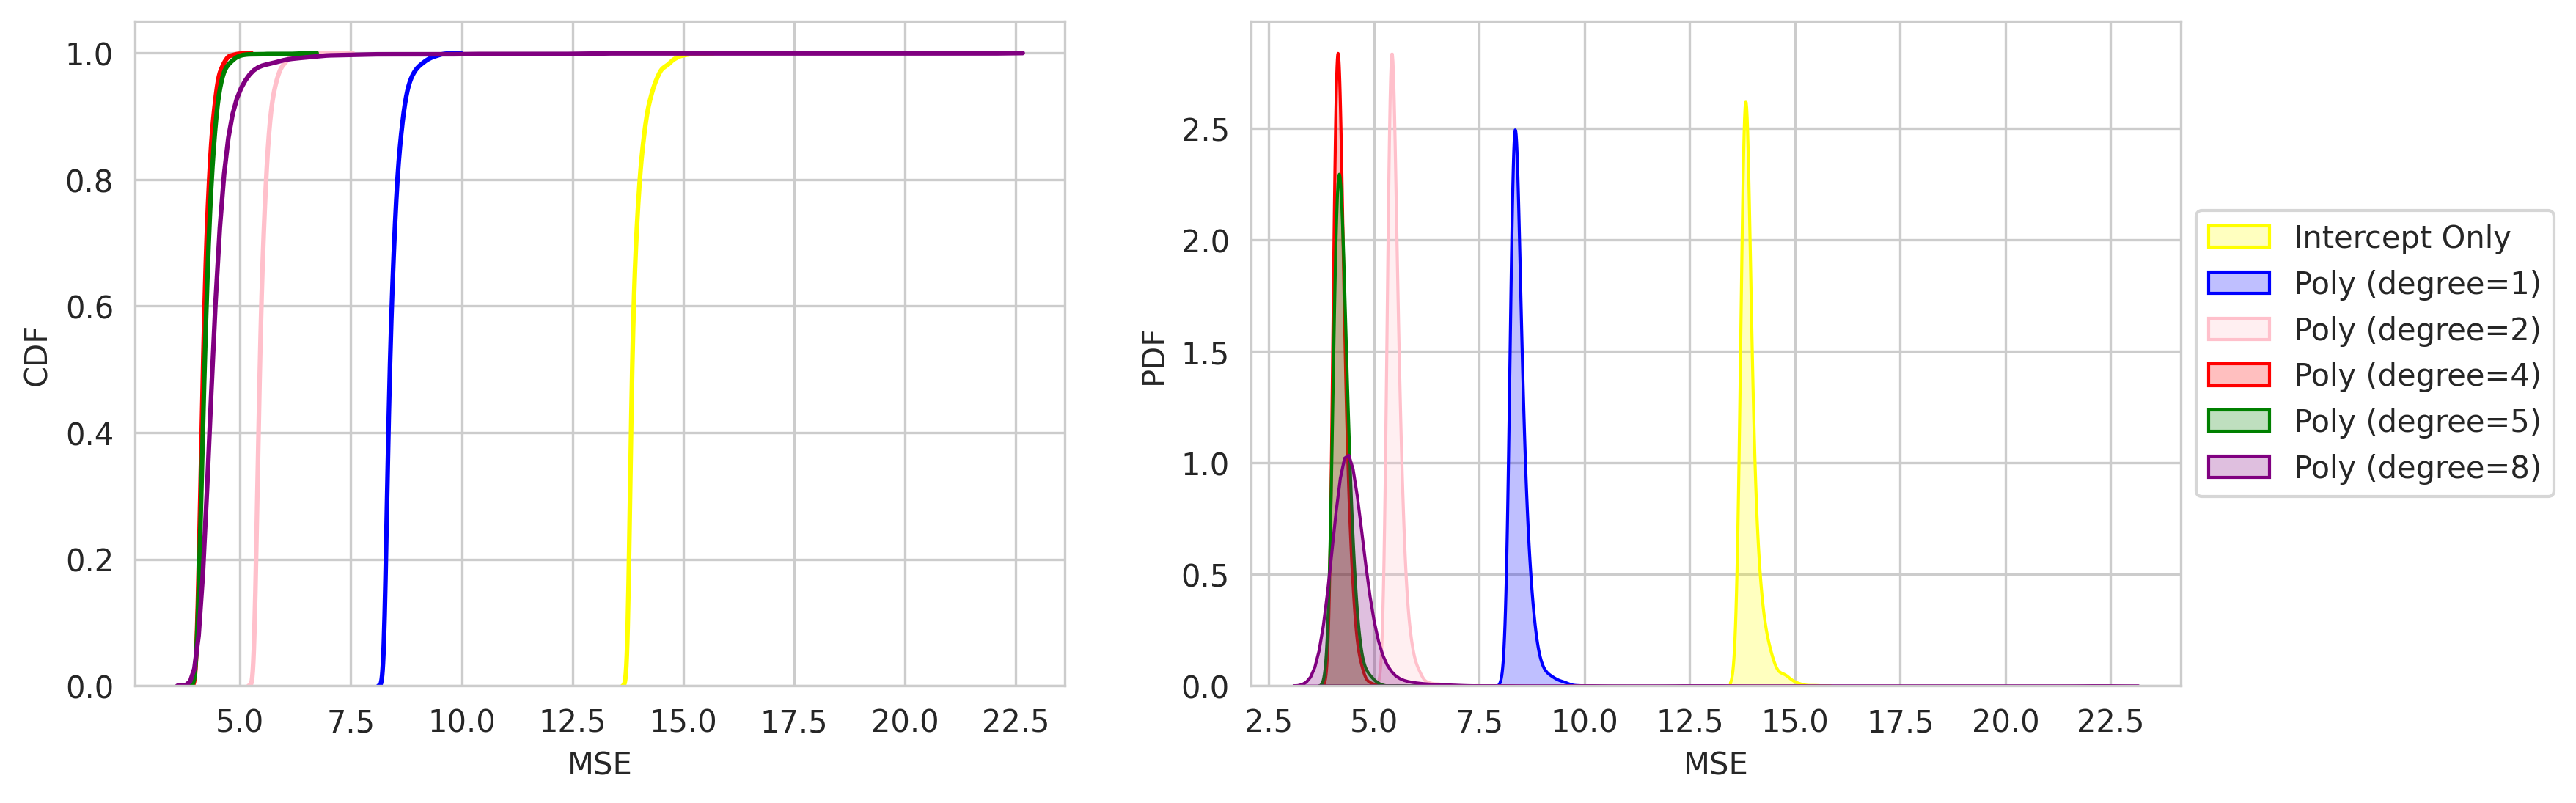

In [ ]:
i = 1

fig, ax = plt.subplots(1,2,figsize=(12,4), dpi=300)

for i, c in enumerate(color_list):
    sns.kdeplot(ax = ax[0], data=all_MSE[:,i], cumulative=True, color=c)
    sns.kdeplot(ax = ax[1], x=all_MSE[:,i], bw_method=0.5, shade=True, color=c, label=label_list[i]);

ax[0].set_ylabel('CDF')
ax[0].set_xlabel('MSE')
ax[1].set_ylabel('PDF')
ax[1].set_xlabel('MSE')

ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
degree_i, counts = np.unique(np.argmin(all_MSE, axis=1), return_counts=True)

results = {'Beest poly degree':np.array(d_list)[degree_i],
        'Counts': counts}

df = pd.DataFrame(results)
print(df)

#np.array([np.array(d_list)[degree_i].reshape(-1,1), counts.reshape(-1,1)])

   Beest poly degree  Counts
0                  4     991
1                  5     769
2                  8     240


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12b73f9a-5dd8-43d6-99ee-0bde04bee819' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>